Initial Data Overview:
       IMO Status           Name Segment Propulsion  Capacity Ordered Date  \
0  7390181  Layup   LNG Aquarius    LNGC         ST    126312   1970-08-01   
1  7390208  Layup  LNG Capricorn    LNGC         ST    126300   1970-08-01   
2  7390143  Layup    Gulf Energy    LNGC         ST    126340   1970-10-01   
3  7390155  Layup  Bering Energy    LNGC         ST    126448   1970-10-01   
4  7390167  Layup     LNG Taurus    LNGC         ST    126385   1970-10-01   

  Delivery Date         Owners       Yard  
0    1977-06-07  PT Trada, MOL  GD Quincy  
1    1978-06-22  Nova Carriers  GD Quincy  
2    1978-09-07        SinoKor  GD Quincy  
3    1978-12-07        SinoKor  GD Quincy  
4    1979-08-07  Nova Carriers  GD Quincy  

Cleaned and Organized Fleet Data:
       IMO           Name Status Segment Propulsion  Capacity Ordered Date  \
0  7390181   LNG Aquarius  Layup    LNGC         ST    126312   1970-08-01   
1  7390208  LNG Capricorn  Layup    LNGC         ST  

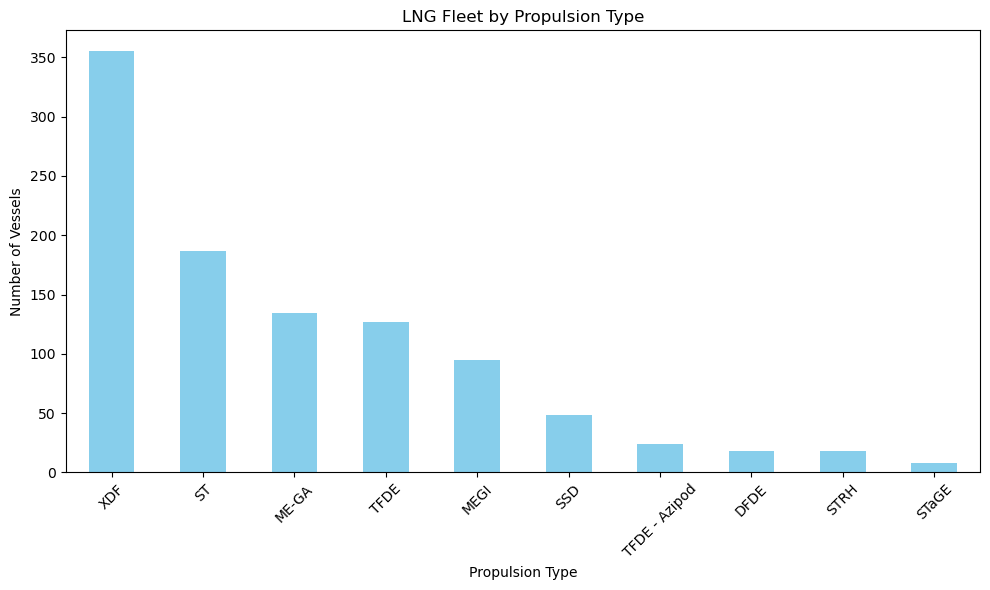

In [2]:
import pandas as pd
from datetime import datetime

# Load Excel file
file_path = 'LNGC fleet list - Fearnley LNG.xlsx'
df = pd.read_excel(file_path)

# Inspect initial data
print("Initial Data Overview:")
print(df.head())

# Clean column names for consistency
df.columns = df.columns.str.strip().str.replace('\n', ' ', regex=True).str.replace(' +', ' ', regex=True)

# Reorder columns logically and select relevant ones
columns_order = ['IMO', 'Name', 'Status', 'Segment', 'Propulsion', 
                 'Capacity', 'Ordered Date', 'Delivery Date', 'Owners', 'Yard']
df = df[columns_order]

# Convert date columns to datetime
df['Ordered Date'] = pd.to_datetime(df['Ordered Date'], errors='coerce')
df['Delivery Date'] = pd.to_datetime(df['Delivery Date'], errors='coerce')

# Calculate vessel age in years
df['Vessel Age (years)'] = ((datetime.today() - df['Delivery Date']).dt.days / 365).round(2)

# Provide a clean overview
print("\nCleaned and Organized Fleet Data:")
print(df.head())

# Save cleaned data to a new Excel file
df.to_excel('LNGC Fleet List Cleaned.xlsx', index=False)
print("\nCleaned data saved to 'LNGC Fleet List Cleaned.xlsx'")

# Basic Statistics
print("\nBasic Statistics:")
print(df.describe(include='all'))

# Fleet Status summary
status_summary = df['Status'].value_counts()
print("\nFleet Status Summary:")
print(status_summary)

# Propulsion type summary
propulsion_summary = df['Propulsion'].value_counts()
print("\nPropulsion Type Summary:")
print(propulsion_summary)

# Owners summary (Top 10 Owners by fleet size)
owners_summary = df['Owners'].value_counts().head(10)
print("\nTop 10 Owners by Fleet Size:")
print(owners_summary)

# Optional Visualization (if you have matplotlib installed)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['Propulsion'].value_counts().plot(kind='bar', color='skyblue')
plt.title('LNG Fleet by Propulsion Type')
plt.ylabel('Number of Vessels')
plt.xlabel('Propulsion Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


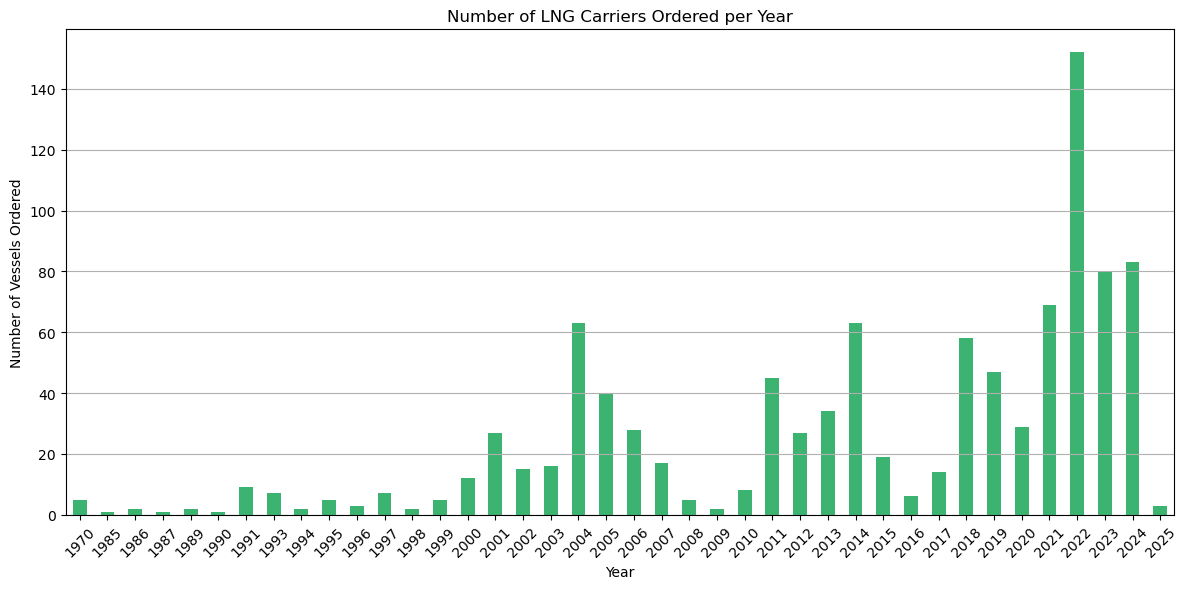

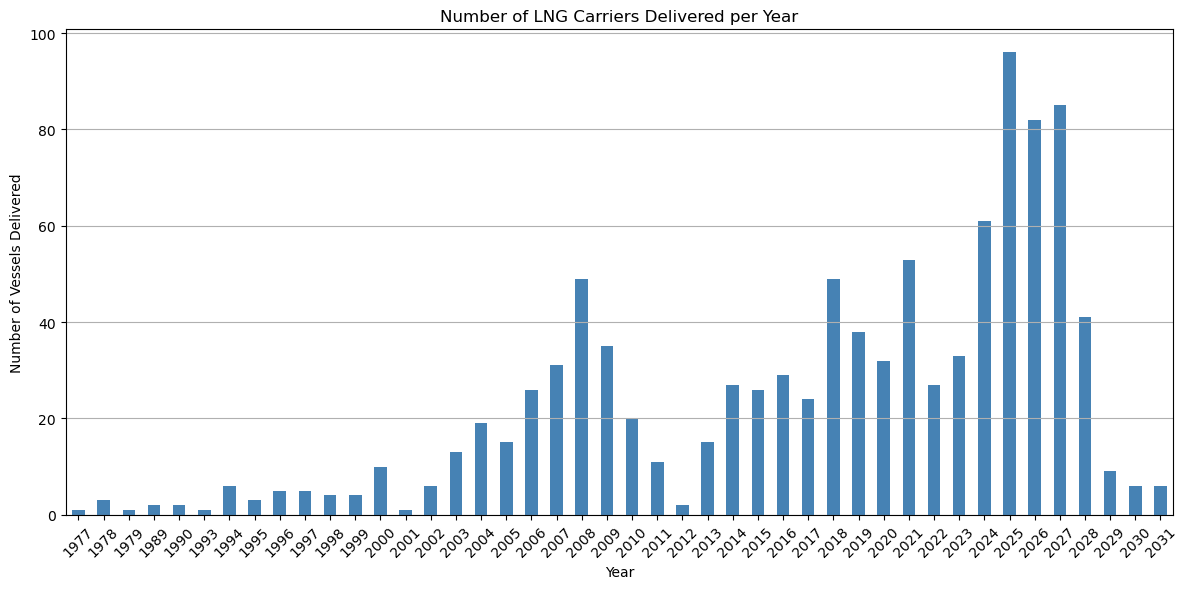

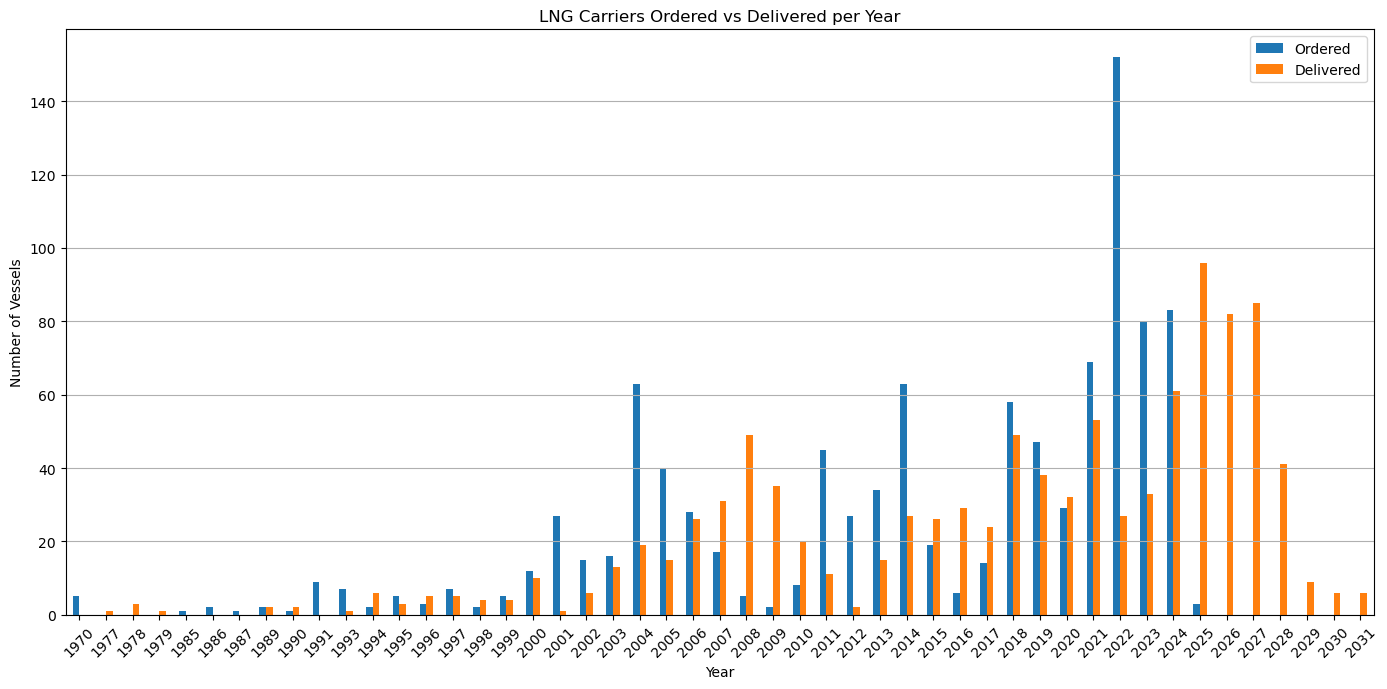

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load Excel file
file_path = 'LNGC fleet list - Fearnley LNG.xlsx'
df = pd.read_excel(file_path)

# Clean column names
df.columns = df.columns.str.strip().str.replace('\n', ' ', regex=True).str.replace(' +', ' ', regex=True)

# Convert date columns to datetime format
df['Ordered Date'] = pd.to_datetime(df['Ordered Date'], errors='coerce')
df['Delivery Date'] = pd.to_datetime(df['Delivery Date'], errors='coerce')

# Calculate vessel age in years
df['Vessel Age (years)'] = ((datetime.today() - df['Delivery Date']).dt.days / 365).round(2)

# Drop rows where dates are not available
df_clean = df.dropna(subset=['Ordered Date', 'Delivery Date'])

# Count vessels ordered per year
ordered_per_year = df_clean['Ordered Date'].dt.year.value_counts().sort_index()

# Count vessels delivered per year
delivered_per_year = df_clean['Delivery Date'].dt.year.value_counts().sort_index()

# Plotting the number of vessels ordered per year
plt.figure(figsize=(12, 6))
ordered_per_year.plot(kind='bar', color='mediumseagreen')
plt.title('Number of LNG Carriers Ordered per Year')
plt.xlabel('Year')
plt.ylabel('Number of Vessels Ordered')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plotting the number of vessels delivered per year
plt.figure(figsize=(12, 6))
delivered_per_year.plot(kind='bar', color='steelblue')
plt.title('Number of LNG Carriers Delivered per Year')
plt.xlabel('Year')
plt.ylabel('Number of Vessels Delivered')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Combine ordered and delivered data into one DataFrame for comparison
combined_df = pd.DataFrame({
    'Ordered': ordered_per_year,
    'Delivered': delivered_per_year
}).fillna(0)

# Plot combined ordered and delivered vessels per year
combined_df.plot(kind='bar', figsize=(14, 7))
plt.title('LNG Carriers Ordered vs Delivered per Year')
plt.xlabel('Year')
plt.ylabel('Number of Vessels')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()


In [14]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('LNGC fleet list - Fearnley LNG.xlsx')

# Print all column names
print(df.columns.tolist())


['IMO', 'Status', 'Name', 'Segment', 'Propulsion', 'Capacity', 'Ordered Date', 'Delivery Date', 'Owners', 'Yard']


       IMO Status           Name Segment Propulsion  Capacity Ordered Date  \
0  7390181  Layup   LNG Aquarius    LNGC         ST    126312   1970-08-01   
1  7390208  Layup  LNG Capricorn    LNGC         ST    126300   1970-08-01   
2  7390143  Layup    Gulf Energy    LNGC         ST    126340   1970-10-01   
3  7390155  Layup  Bering Energy    LNGC         ST    126448   1970-10-01   
4  7390167  Layup     LNG Taurus    LNGC         ST    126385   1970-10-01   

  Delivery Date         Owners       Yard  
0    1977-06-07  PT Trada, MOL  GD Quincy  
1    1978-06-22  Nova Carriers  GD Quincy  
2    1978-09-07        SinoKor  GD Quincy  
3    1978-12-07        SinoKor  GD Quincy  
4    1979-08-07  Nova Carriers  GD Quincy  


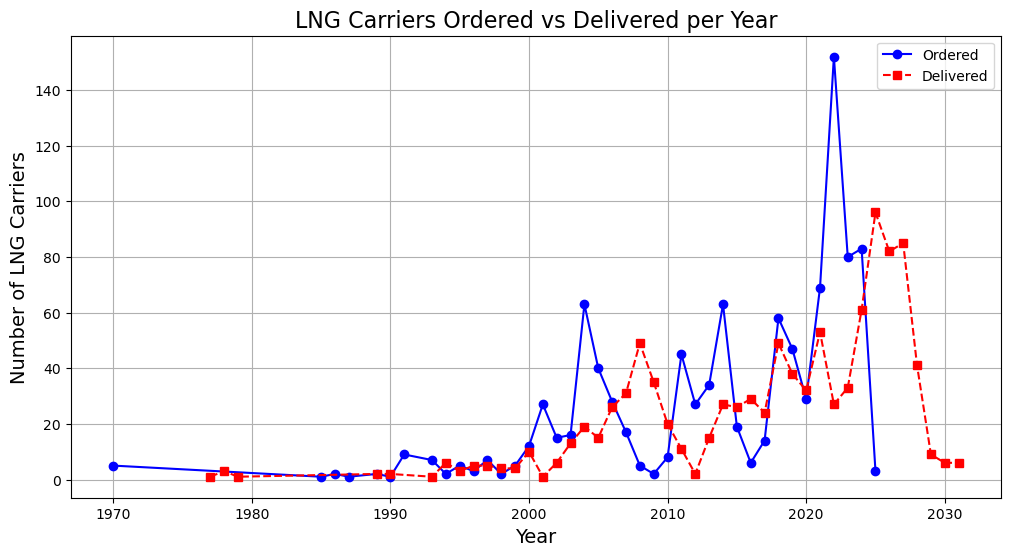

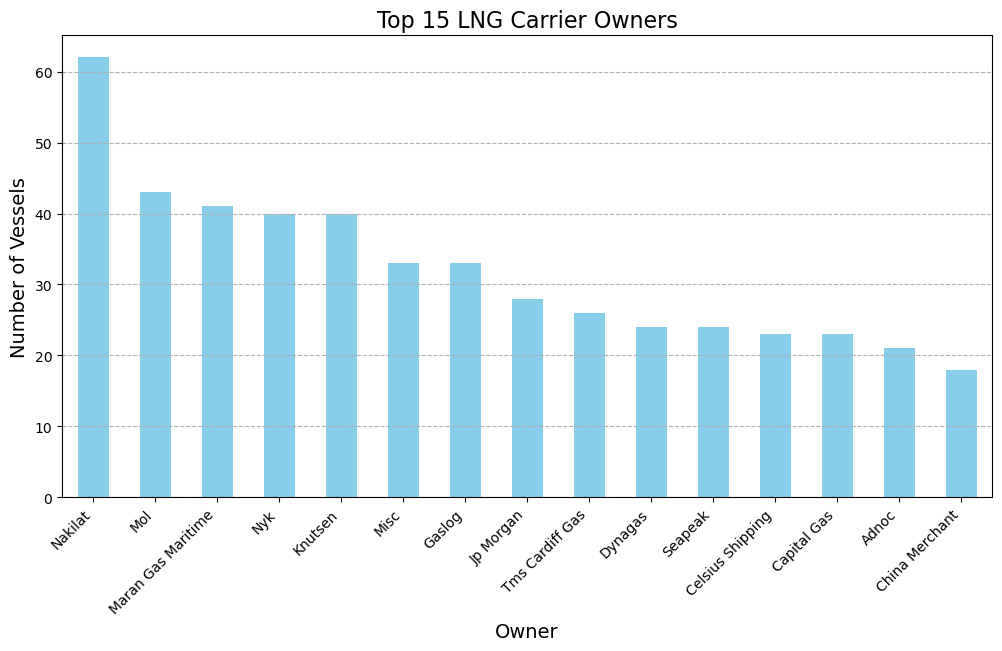

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('LNGC fleet list - Fearnley LNG.xlsx')

# Verify the dataframe structure
print(df.head())

# Cleaning: standardize owners' names
df['Owners'] = df['Owners'].str.strip().str.title()

# Extract year from 'Ordered Date' and 'Delivery Date'
df['Order Year'] = pd.to_datetime(df['Ordered Date'], errors='coerce').dt.year
df['Delivery Year'] = pd.to_datetime(df['Delivery Date'], errors='coerce').dt.year

# Count number of vessels ordered and delivered per year
orders_per_year = df['Order Year'].value_counts().sort_index()
deliveries_per_year = df['Delivery Year'].value_counts().sort_index()

# Plot ordered vs delivered per year
plt.figure(figsize=(12, 6))
plt.plot(orders_per_year.index, orders_per_year, marker='o', linestyle='-', color='b', label='Ordered')
plt.plot(deliveries_per_year.index, deliveries_per_year, marker='s', linestyle='--', color='r', label='Delivered')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of LNG Carriers', fontsize=14)
plt.title('LNG Carriers Ordered vs Delivered per Year', fontsize=16)
plt.legend()
plt.grid()
plt.show()

# Count vessels per owner
owner_counts = df['Owners'].value_counts().head(15)  # Top 15 owners

# Plot vessels per owner
plt.figure(figsize=(12, 6))
owner_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Owner', fontsize=14)
plt.ylabel('Number of Vessels', fontsize=14)
plt.title('Top 15 LNG Carrier Owners', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()


C:\Users\Eier\AppData\Local\Temp\ipykernel_50596\1053971686.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_yards.values, y=top_yards.index, palette='Greens_d')


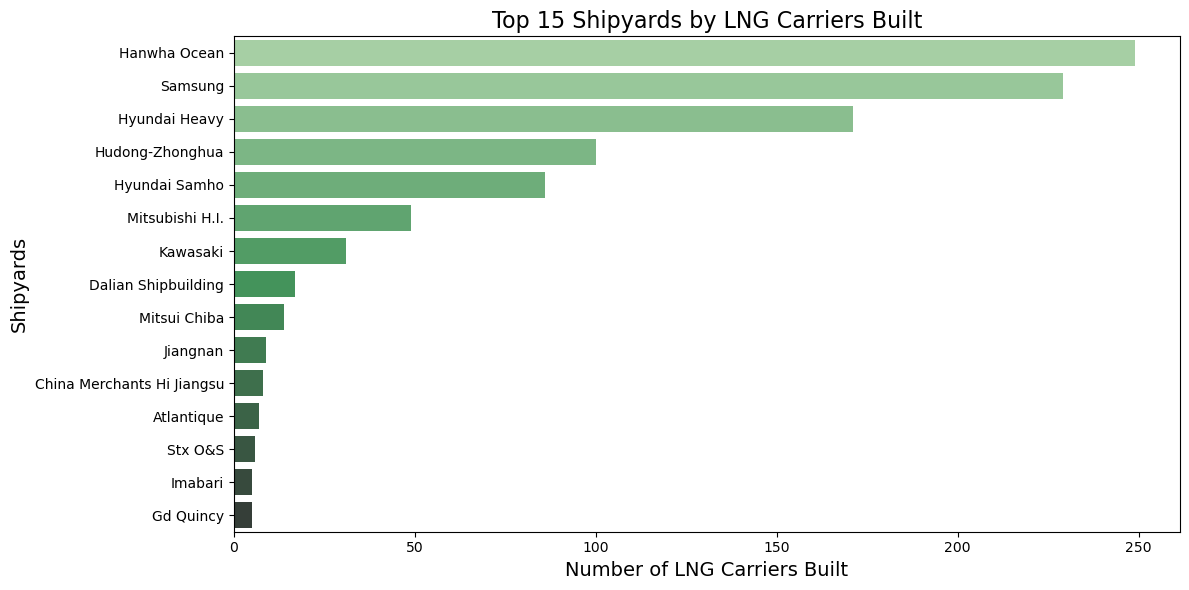

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
df = pd.read_excel("LNGC fleet list - Fearnley LNG.xlsx")

# Ensure correct columns exist
required_columns = ['Yard']
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise KeyError(f"Missing columns: {missing_cols}")

# Clean: Standardize yard names
df['Yard'] = df['Yard'].astype(str).str.strip().str.title()

# Visualization: Top 15 Yards
top_yards = df['Yard'].value_counts().nlargest(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_yards.values, y=top_yards.index, palette='Greens_d')
plt.xlabel('Number of LNG Carriers Built', fontsize=14)
plt.ylabel('Shipyards', fontsize=14)
plt.title('Top 15 Shipyards by LNG Carriers Built', fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\Eier\AppData\Local\Temp\ipykernel_50596\550513270.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette='Blues_d')


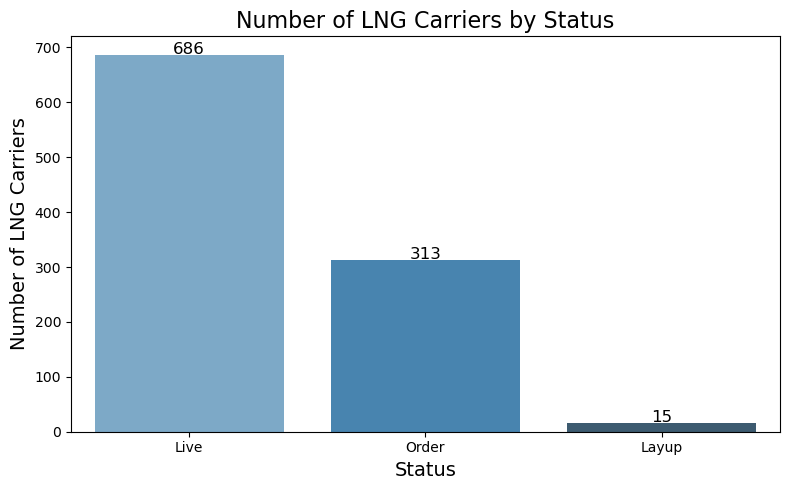

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
df = pd.read_excel("LNGC fleet list - Fearnley LNG.xlsx")

# Check if 'Status' column exists
if 'Status' not in df.columns:
    raise KeyError("Missing column: 'Status'")

# Standardize the status names
df['Status'] = df['Status'].astype(str).str.strip().str.title()

# Count the number of vessels per status
status_counts = df['Status'].value_counts()

# Select only relevant statuses (Layup, Live, Order)
relevant_statuses = ['Layup', 'Live', 'Order']
status_counts = status_counts[status_counts.index.isin(relevant_statuses)]

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=status_counts.index, y=status_counts.values, palette='Blues_d')

# Adding counts on bars
for i, count in enumerate(status_counts.values):
    plt.text(i, count + 2, str(count), ha='center', fontsize=12)

plt.xlabel('Status', fontsize=14)
plt.ylabel('Number of LNG Carriers', fontsize=14)
plt.title('Number of LNG Carriers by Status', fontsize=16)
plt.tight_layout()
plt.show()
